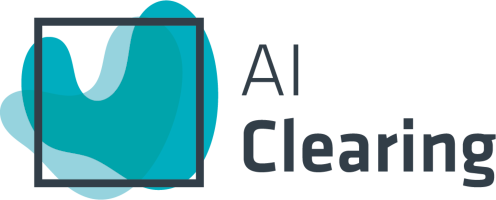

---
# Introduction
At AI Clearing we use image classification and segmentation models based on deep convolutional neural networks for construction site progress reporting. We have prepared two tasks for you which are closely related to what you would deal with on a daily basis if you were in the AI team.



# Task 1

Download the Fashion-MNIST dataset (https://github.com/zalandoresearch/fashion-mnist). It contains 28x28 single-channel images of clothes grouped into ten classes. There are 60000 examples in the training dataset and 10000 examples in the test dataset. Each training and test example has one of the following labels assigned:

| Label | Description |
| ----- | ----------- |
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

We will focus on detecting shoes. Labels 5, 7 and 9 (Sandal, Sneaker and Ankle boot) should be treated as positive and all others (such as Trouser, Dress and so on) should be negative.

Please prepare a CNN model for binary classification in PyTorch. You should propose a custom architecture instead of using pretrained models. Train it on samples from Fashion-MNIST’s train dataset and evaluate the quality of the proposed model on samples from Fashion-MNIST’s test dataset.


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

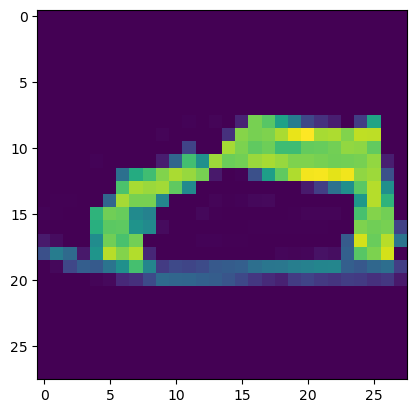

In [97]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import random_split, DataLoader
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

BATCH_SIZE = 1

train_dataset = FashionMNIST(root='./', train=True, download=True, transform=ToTensor())
test_dataset =  FashionMNIST(root='./', train=False, download=True, transform=ToTensor())

train_size = int(len(train_dataset)*0.8)
val_size = int(len(train_dataset) - train_size)


train, validation = random_split(dataset = train_dataset, 
                          lengths = [train_size, val_size], 
                          generator = torch.Generator().manual_seed(77))


train_dataloader = DataLoader(dataset=train, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset = validation, batch_size=BATCH_SIZE, shuffle = False)
test_dataloader = DataLoader(dataset = test_dataset, batch_size=BATCH_SIZE, shuffle = True)


dataiterator = iter(test_dataloader)
img, label = next(dataiterator)
img = img.squeeze()
plt.imshow(img)

train_dataset.train_labels

train_dataset.class_to_idx


tensor([5])
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


'model = BinaryFMnist()\noutput = model(img)\noutput'

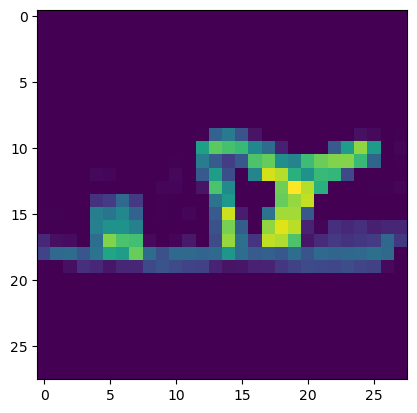

In [104]:
class BinaryFMnist(nn.Module):
    def __init__(self):
        super(BinaryFMnist, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 128)
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(128, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x


dataiterator = iter(test_dataloader)
img, label = next(dataiterator)

print(label)
print(train_dataset.class_to_idx)
img = img.squeeze()
plt.imshow(img)

"""model = BinaryFMnist()
output = model(img)
output"""



# Task 2
After finishing the first task you should have a pre-trained CNN model. Your second task will be to classify shoes into two groups - Heels and Flats. Download the Shoes dataset (https://drive.google.com/file/d/18vadC13cpUlfXaSoYb7tk0nVZ9jw4VhX). There are two samples in the training split: one sample of Heels and one sample of Flats. Your solution can only use these examples and the model from the previous task. Evaluate the quality of your model on a provided test dataset.


In [ ]:
# Solution for Task 2
